## <font color="green"><h4 align="left"> Practice Statistical analysis </font>

In [24]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("C://Users//kamalakannan.x.balak//PythonCode//Files//weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


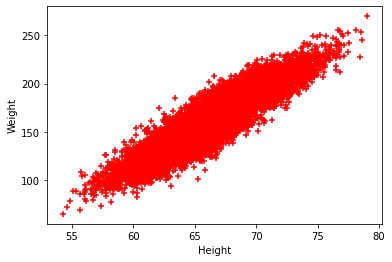

In [26]:
%matplotlib inline
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(df.Height,df.Weight,color='red',marker='+')

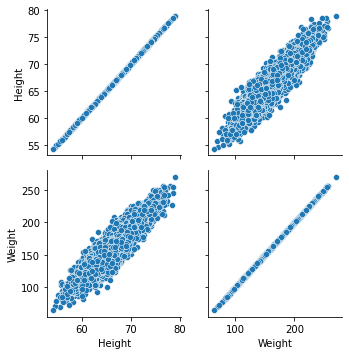

In [27]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)
#sns.PairGrid(df)

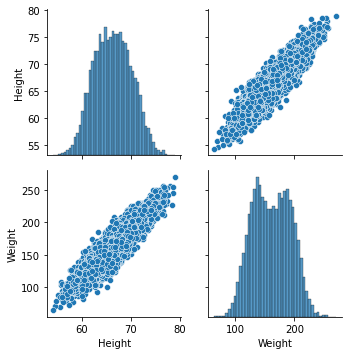

In [28]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

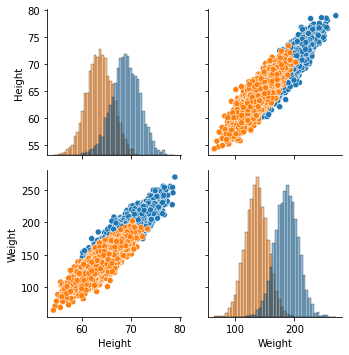

In [29]:
g = sns.PairGrid(df, hue='Gender')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

<AxesSubplot:xlabel='Height', ylabel='Weight'>

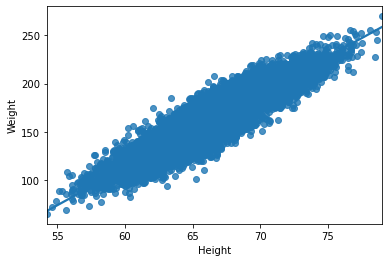

In [30]:
#regression 
sns.regplot(x="Height", y="Weight", data=df)

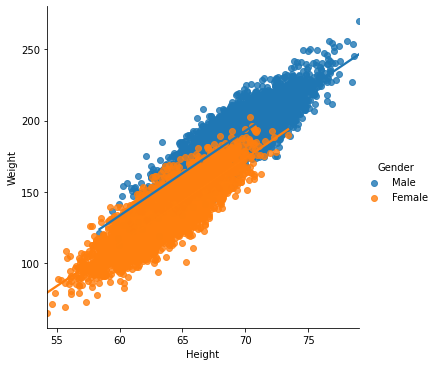

In [31]:
sns.lmplot(x="Height", y="Weight", hue='Gender', data=df)

In [32]:
dfb=df.head(10000)

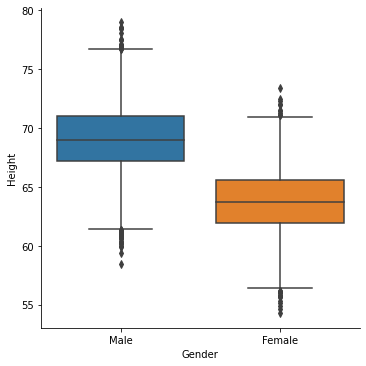

In [33]:
sns.catplot(y="Height", x="Gender", kind="box", data=dfb)

In [34]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [35]:
df1=df.drop('Weight',axis='columns')
df1

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [46]:
df1.describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


<AxesSubplot:ylabel='Count'>

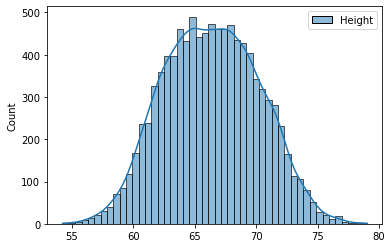

In [37]:
sns.histplot(df1, kde=True)

In [38]:
mean=df.Height.mean()
mean

66.36755975482106

In [39]:
std=df.Height.std()
std

3.8475281207732324

### <font color="green"><h4 align="left">Remove Outliers: by exclude +/-3 variance </font>

In [40]:
mean - 3*std

54.82497539250136

In [41]:
mean+3*std

77.91014411714076

In [44]:
df[(df.Height>77.9) | (df.Height<54.8)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [48]:
df_no_outlier = df1[(df1.Height<77.9) & (df1.Height>54.8)]
df_no_outlier.shape


(9993, 2)

In [49]:
df_no_outlier.describe()

,Height
count,9993.000000
mean,66.363856
std,3.835511
min,54.873728
25%,63.505894
50%,66.317755
75%,69.169353
max,77.547186


<AxesSubplot:ylabel='Count'>

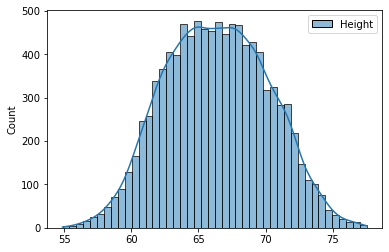

In [51]:
sns.histplot(df_no_outlier, kde=True)

In [52]:
df1['zscore'] = (df1.Height-df1.Height.mean())/df1.Height.std()
df1.head()

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [56]:
df_no_out=df1[(df1.zscore>-3) & (df1.zscore<3)]
df_no_out

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090
